## Creating a Bell State

In [2]:
# Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, assemble, execute
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

Create a circuit

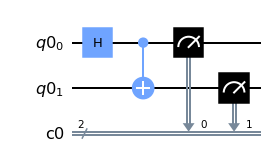

In [3]:
qr = QuantumRegister(2)
r = ClassicalRegister(2)
qc = QuantumCircuit(qr,r)
qc.h(0)
qc.cx(0,1)
qc.measure(qr,r)
qc.draw('mpl')

Run using an error-free simulator

In [4]:
from qiskit.providers.aer import QasmSimulator
sim = QasmSimulator()

In [5]:
job = execute(qc, sim, shots=1024)
sim_counts = job.result().get_counts()

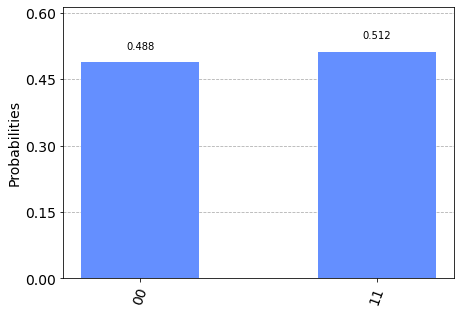

In [6]:
plot_histogram(sim_counts)

Now create a simulator with a noise model to simulate noisy hardware

In [7]:
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error

In [8]:
# Example noise model, from https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html
# Example error probabilities
p_reset = 0.03  # when reset to 0, result is 1 with probability 0.03
p_meas = 0.1    # when measuring, flip the state with probability 0.1
p_gate1 = 0.05  # when applying a single-qubit gate, flip the outcome with probability 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

In [9]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)

# Transpile circuit for noisy basis gates
qc_tnoise = transpile(qc, sim_noise)

# Run and get counts
result_bit_flip = sim_noise.run(qc_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

NameError: name 'transpile' is not defined